In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# I would get this error if i tried to load it as an utf-8
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf6 in position 68014: invalid start byte
with open("ShareRaceByCity.csv") as src_file:
        result =  src_file.encoding
result

'cp1252'

In [3]:
# We then have Windows-1252 formatted files

df_hh_income = pd.read_csv('MedianHouseholdIncome2015.csv', encoding='windows-1252')
df_pct_poverty = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding='windows-1252')
df_pct_completed_hs = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding='windows-1252')
df_share_race_city = pd.read_csv('ShareRaceByCity.csv', encoding='windows-1252')
df_fatalities = pd.read_csv('PoliceKillingsUS.csv', encoding='windows-1252')

## Preliminary data exploration

We're going to look at the features, what are the missing values and how we could feature engineer these databases.

The explanations of the code will be written for the first dataset, and then they'll be roughly the same

### Median Household Income

In [4]:
#How many columns and rows ?
df_hh_income.shape

(29322, 3)

In [5]:
#Quick view of the features
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [98]:
df_hh_income.describe()

,Geographic Area,City,Median Income
count,29322,29322,29271
unique,51,24249,14592
top,PA,Franklin city,(X)
freq,1762,16,1113


In [6]:
#Quick view of the values ( and check if nothing is missing )
pd.unique(df_hh_income["Geographic Area"].values)

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [7]:
pd.unique(df_hh_income["City"].values)

array(['Abanda CDP', 'Abbeville city', 'Adamsville city', ...,
       'Wright town', 'Yoder town', 'Y-O Ranch CDP'], dtype=object)

In [8]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


**Even median income has to be converted**

In [9]:
# Check missing values
df_hh_income.isnull().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

#### Is there something else than valid numbers ?

In [10]:
# Check if there is something that is not a number in the income column
pd.unique(df_hh_income["Median Income"].str.extractall(r"([\D])").values.ravel())

array(['(', 'X', ')', '-', ',', '+'], dtype=object)

In [11]:
df_hh_income["Median Income"].str.extractall(r"([,])").head()

,,0
,match,
1347,0,","
1992,0,","
2611,0,","
2628,0,","
2885,0,","


In [12]:
df_hh_income["Median Income"].str.extractall(r"([-])").head()

,,0
,match,
71,0,-
74,0,-
84,0,-
338,0,-
462,0,-


In [13]:
# Apparently some missing data are described with (X)
df_hh_income.iloc[44]

Geographic Area             AL
City               Benton town
Median Income              (X)
Name: 44, dtype: object

In [14]:
# and we seem to have numbers with commas and +/- to indicate superior/inferior boundaries
df_hh_income.iloc[1992]

Geographic Area               CA
City               Atherton town
Median Income           250,000+
Name: 1992, dtype: object

In [15]:
# And some - are used to show null values
df_hh_income.iloc[71]

Geographic Area           AL
City               Bucks CDP
Median Income              -
Name: 71, dtype: object

### Percentage People Below Poverty Level

In [16]:
df_pct_poverty.shape

(29329, 3)

In [17]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


**We could merge the two first datasets together for better usability**

In [18]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [19]:
df_pct_poverty.isnull().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [20]:
pd.unique(df_pct_poverty["Geographic Area"].values)

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [21]:
pd.unique(df_pct_poverty["City"].values)

array(['Abanda CDP', 'Abbeville city', 'Adamsville city', ...,
       'Wright town', 'Yoder town', 'Y-O Ranch CDP'], dtype=object)

In [22]:
pd.unique(df_pct_poverty["poverty_rate"].str.extractall(r"([\D])").values.ravel())

array(['.', '-'], dtype=object)

In [23]:
df_pct_poverty["poverty_rate"].str.extractall(r"(-)").head()

,,0
,match,
573,0,-
608,0,-
632,0,-
637,0,-
662,0,-


In [24]:
# - is used to show null values
df_pct_poverty.iloc[573]

Geographic Area             AL
City               Whatley CDP
poverty_rate                 -
Name: 573, dtype: object

### Percent Over 25 Completed HighSchool

In [14]:
df_pct_completed_hs.shape

(29329, 3)

In [15]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [16]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [17]:
df_pct_completed_hs.isnull().sum()

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

In [22]:
pd.unique(df_pct_completed_hs["percent_completed_hs"].str.extractall(r"(\D)").values.ravel())

array(['.', '-'], dtype=object)

In [23]:
df_pct_completed_hs["percent_completed_hs"].str.extractall(r"(-)").head()

,,0
,match,
573,0,-
632,0,-
637,0,-
662,0,-
667,0,-


In [20]:
df_pct_completed_hs.iloc[667]

Geographic Area                    AK
City                    Edna Bay city
percent_completed_hs                -
Name: 667, dtype: object

### Share Race By City

In [44]:
df_share_race_city.shape

(29268, 7)

In [26]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [48]:
df_share_race_city.isnull().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [47]:
pd.unique(df_share_race_city["Geographic area"].values)

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [111]:
pd.unique(df_share_race_city["share_hispanic"].str.extractall(r"([\D])").values.ravel())

array(['.'], dtype=object)

In [52]:
pd.unique(df_share_race_city["share_white"].str.extractall(r"([\D])").values.ravel())

array(['.', '(', 'X', ')'], dtype=object)

**Seems we have the same problem with (X)'s and we can suppose it's the same for the others columns**

### Police killings

In [4]:
df_fatalities.shape

(2535, 14)

In [5]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Taking a look at [the shooting of Matthew Hoffman report](https://sfdistrictattorney.org/wp-content/uploads/2020/10/Hoffman-final-02142018_0.pdf), we can see that all the informations are related to the person shot, except the manner of death and the body camera who are from the Police officers "features"

In [6]:
df_fatalities.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

**We have a bunch of null values to handle**

In [56]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [80]:
# Checking if all the values are valid

In [73]:
pd.unique(df_fatalities.manner_of_death.values.ravel())

array(['shot', 'shot and Tasered'], dtype=object)

In [74]:
pd.unique(df_fatalities.armed.values.ravel())

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole a

**We have to combine undetermined, nan, unknown weapon into a single category : Unknown**

In [79]:
pd.unique(df_fatalities.gender.values.ravel())

array(['M', 'F'], dtype=object)

In [81]:
pd.unique(df_fatalities.threat_level.values.ravel())

array(['attack', 'other', 'undetermined'], dtype=object)

In [82]:
pd.unique(df_fatalities.flee.values.ravel())

array(['Not fleeing', 'Car', 'Foot', 'Other', nan], dtype=object)

## Data cleaning

### Median income

In [130]:
# Turn fake nan's into real ones
df_hh_income["Median Income"].replace(["(X)","-"], np.NaN, inplace=True)

In [132]:
df_hh_income.isna().sum()

Geographic Area       0
City                  0
Median Income      1904
dtype: int64

In [125]:
#Turn boundaries into constant values
df_hh_income["Median Income"].replace(regex="([,]*\d[+])", value=250000, inplace=True)

In [129]:
df_hh_income["Median Income"].replace(regex="([,]*\d[-])", value=2500, inplace=True)

In [131]:
pd.unique(df_hh_income["Median Income"].str.extractall(r"([\D])").values.ravel())

array([], dtype=object)

In [137]:
df_hh_income["Median Income"] = pd.to_numeric(df_hh_income["Median Income"])

In [143]:
# Fill nan's with median
df_hh_income["Median Income"].fillna(df_hh_income["Median Income"].median(), inplace=True)

In [144]:
df_hh_income.isna().sum()

Geographic Area    0
City               0
Median Income      0
dtype: int64

In [145]:
df_hh_income.to_csv("MedianHouseholdIncome2015.csv", index=False)

### Percentage People Below Poverty Level

In [57]:
df_pct_poverty["poverty_rate"].replace("-",np.NaN,inplace=True)
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"])
df_pct_poverty["poverty_rate"].fillna(df_pct_poverty["poverty_rate"].mean(),inplace=True)

In [34]:
df_pct_poverty.isnull().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [59]:
df_pct_poverty.to_csv("PercentagePeopleBelowPovertyLevel.csv", index=False)

## Completed highschool

In [51]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.replace("-", np.NaN)
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)
df_pct_completed_hs.fillna(df_pct_completed_hs.percent_completed_hs.mean(), inplace= True)
df_pct_completed_hs.to_csv("PercentOver25CompletedHighSchool.csv", index=False)

### Share Race By City

In [4]:
# Dans chaque share_ , replace avec lambda
df_share_race_city[["share_white","share_black","share_native_american","share_asian","share_hispanic"]] = df_share_race_city[["share_white","share_black","share_native_american","share_asian","share_hispanic"]].replace("(X)",np.NaN)
df_share_race_city[["share_white","share_black","share_native_american","share_asian","share_hispanic"]] = df_share_race_city[["share_white","share_black","share_native_american","share_asian","share_hispanic"]].apply(pd.to_numeric)
df_share_race_city["share_white"].fillna(df_share_race_city["share_white"].mean(), inplace=True)
df_share_race_city["share_black"].fillna(df_share_race_city["share_black"].mean(), inplace=True)
df_share_race_city["share_native_american"].fillna(df_share_race_city["share_native_american"].mean(), inplace=True)
df_share_race_city["share_asian"].fillna(df_share_race_city["share_asian"].mean(), inplace=True)
df_share_race_city["share_hispanic"].fillna(df_share_race_city["share_hispanic"].mean(), inplace=True)

In [5]:
df_share_race_city.to_csv("ShareRaceByCity.csv", index=False)

## Police killings

In [4]:
df_fatalities.armed = df_fatalities.armed.replace(["undetermined","unknown weapon","unknown"], np.NaN)
df_fatalities.armed.fillna("Unknown", inplace=True)

In [5]:
df_fatalities.race.replace("O",np.NaN, inplace=True)
df_fatalities.race.fillna("U", inplace=True) #Unknown

In [6]:
df_fatalities.flee.fillna("Other",inplace=True)

In [7]:
df_fatalities.age.fillna(df_fatalities.age.mean, inplace=True)

In [8]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

## EDA

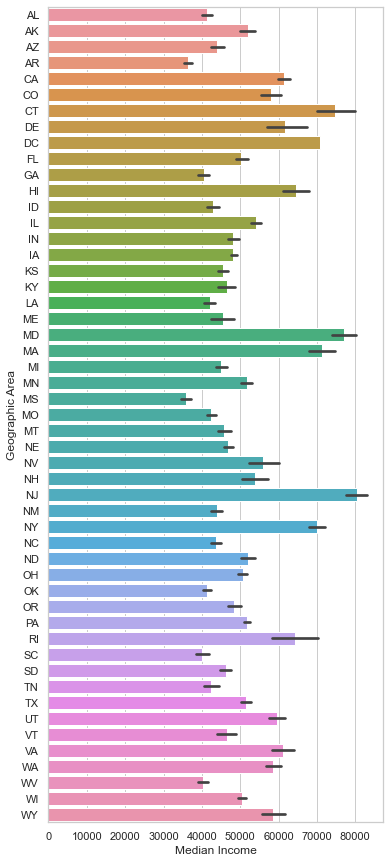

In [22]:
# Median income depending on area
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="Median Income", y="Geographic Area", data=df_hh_income);

**We can see significant differences between Arizona with 35k while people in New Jersey earn in average 80k**

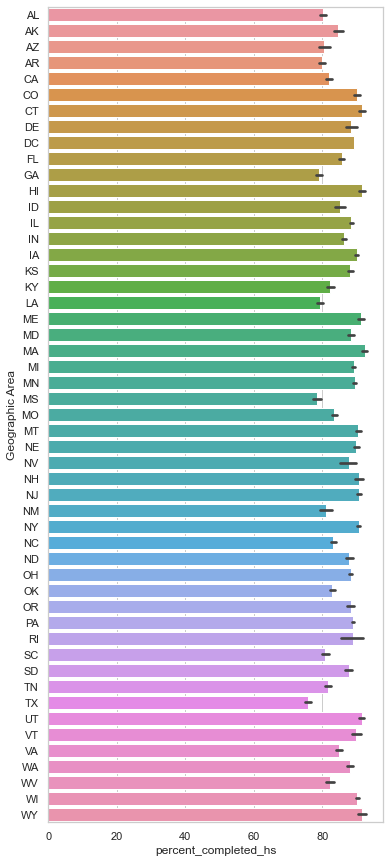

In [24]:
# Highschool completion depending on area
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="percent_completed_hs", y="Geographic Area", data=df_pct_completed_hs);

**The differeneces here are less significant, even though we can see a 20 points difference between Wyoming (~95%) and Texas(~75%)**

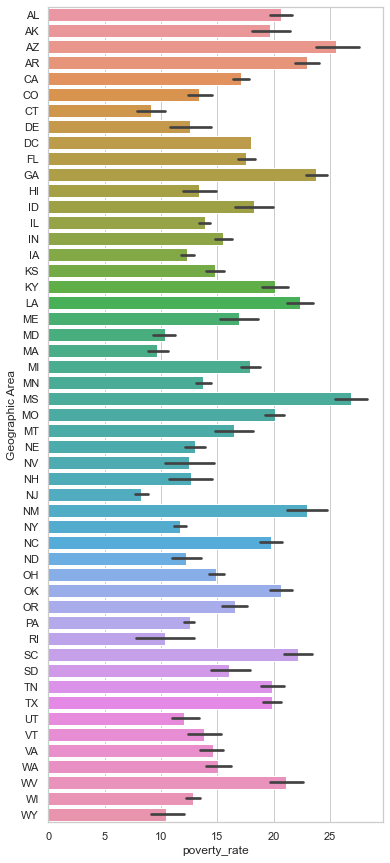

In [36]:
# Poverty rate depending on area
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="poverty_rate", y="Geographic Area", data=df_pct_poverty);

### Percentage completed highschool depending on poverty

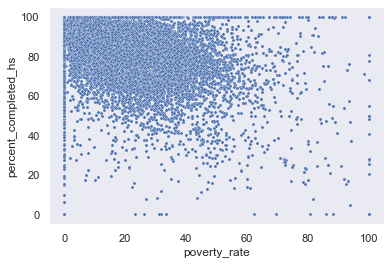

In [86]:
sns.scatterplot(x=df_pct_poverty.poverty_rate, y=df_pct_completed_hs.percent_completed_hs, s=10);

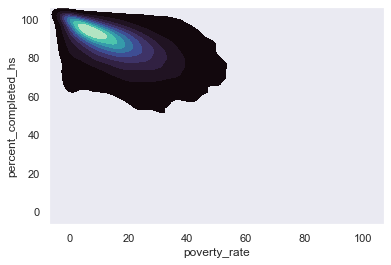

In [87]:
sns.kdeplot(x=df_pct_poverty.poverty_rate, y=df_pct_completed_hs.percent_completed_hs, shade=True, cmap="mako");

**We can see a clear yet expected trend**

### Origin sharing accross states

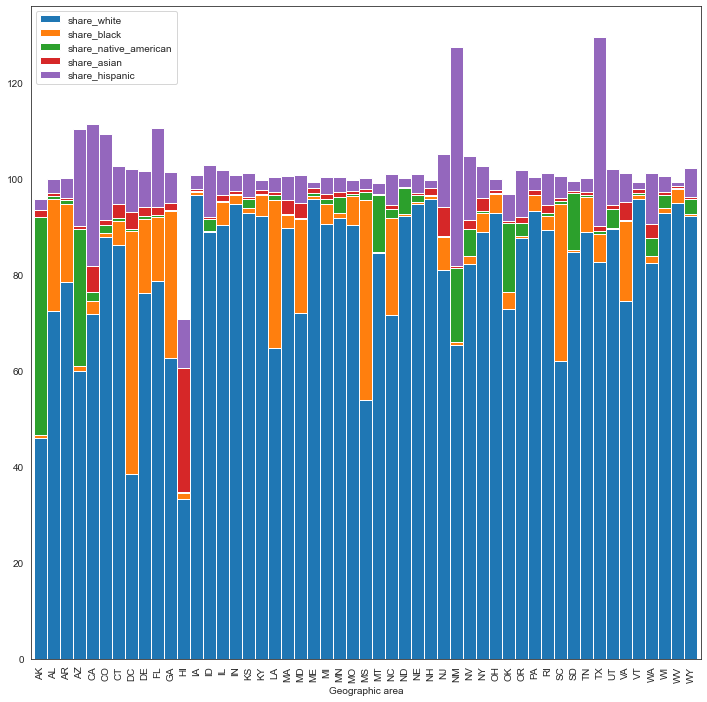

In [27]:
df_share_race_city.groupby("Geographic area").mean().plot(kind="bar",stacked=True,figsize=(12,12), width=1)

### Fatalities depending on race

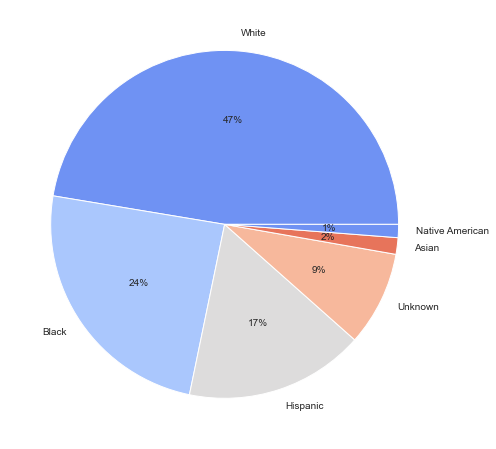

In [53]:
plt.figure(figsize=(8,8))

plt.pie(df_fatalities.race.value_counts(),
       labels=["White","Black","Hispanic","Unknown", "Asian", "Native American"],
       autopct='%.0f%%',
       colors=sns.color_palette("coolwarm",5));

**The result seems weird : there are way more white people in the US so let's scale the data by dividing by the race sharing**

In [85]:
df_share_tmp = pd.DataFrame(df_fatalities.race.value_counts())
df_share_tmp

,race
W,1201
B,618
H,423
U,223
A,39
N,31


In [101]:
df_share_tmp.iloc[0] = df_share_tmp.iloc[0] / (df_share_race_city.share_white.mean() / 100)
df_share_tmp.iloc[1] = df_share_tmp.iloc[1] / (df_share_race_city.share_black.mean() / 100)
df_share_tmp.iloc[2] = df_share_tmp.iloc[2] / (df_share_race_city.share_hispanic.mean() / 100)
df_share_tmp.iloc[4] = df_share_tmp.iloc[4] / (df_share_race_city.share_asian.mean() / 100)
df_share_tmp.iloc[5] = df_share_tmp.iloc[5] / (df_share_race_city.share_native_american.mean() / 100)

In [102]:
df_share_tmp

,race
W,1443.286963
B,9042.216404
H,4534.026905
U,223.000000
A,2526.041655
N,1078.172398


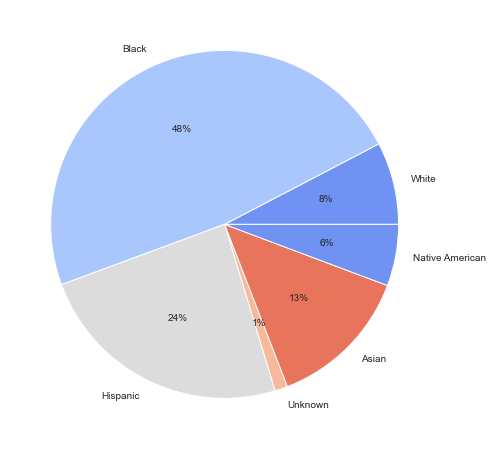

In [103]:
plt.figure(figsize=(8,8))

plt.pie(df_share_tmp.race,
       labels=["White","Black","Hispanic","Unknown", "Asian", "Native American"],
       autopct='%.0f%%',
       colors=sns.color_palette("coolwarm",5));

### Do the same with gender

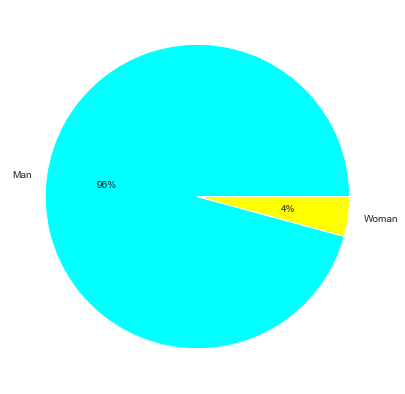

In [113]:
plt.figure(figsize=(7,7))

plt.pie(df_fatalities.gender.value_counts(),
       labels=["Man","Woman"],
       colors=["cyan","yellow"],
       autopct="%.0f%%");

### Different ways of dying

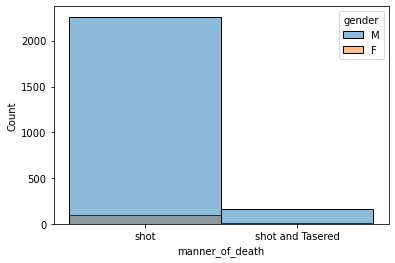

In [11]:
sns.histplot(x=df_fatalities.manner_of_death, hue=df_fatalities.gender);


<AxesSubplot:xlabel='manner_of_death', ylabel='Count'>

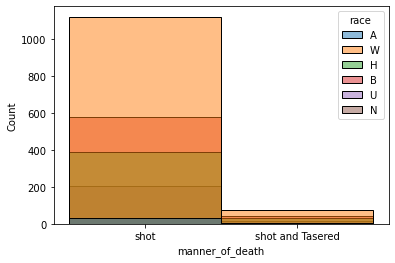

In [12]:
sns.histplot(x=df_fatalities.manner_of_death, hue=df_fatalities.race)

**The figures seems to respect the proportion of each group**

In [124]:
df_hh_income.groupby("Geographic Area").median().apply(round).median()


Median Income    46472.0
dtype: float64

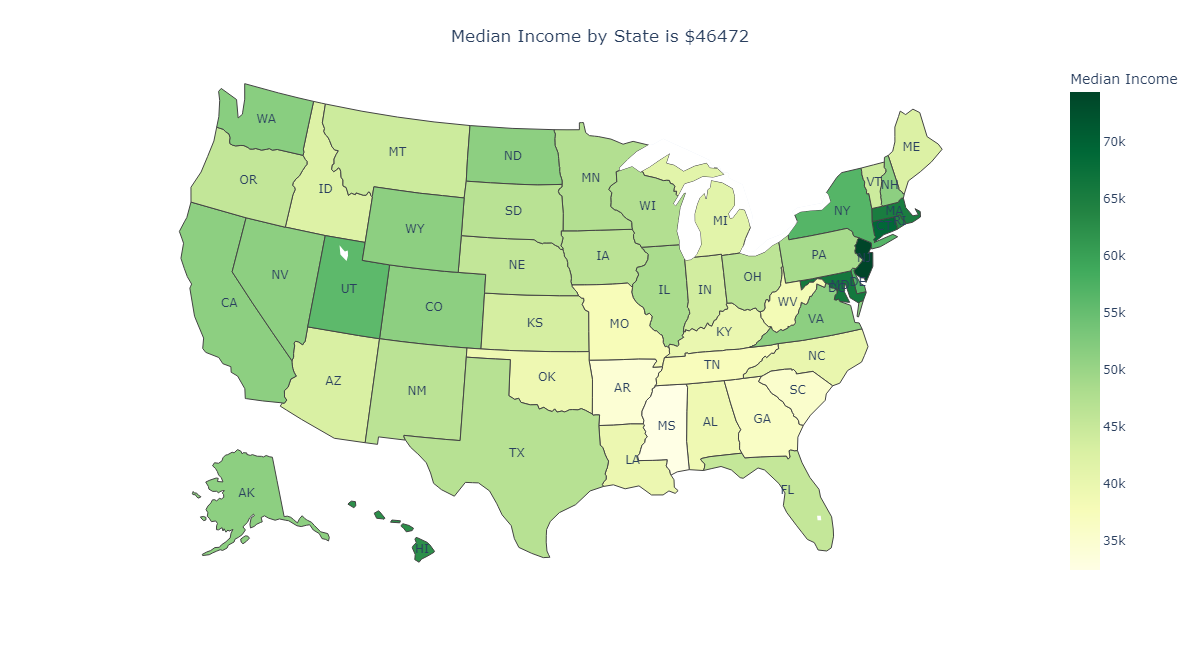

In [12]:
import plotly.express as px

df = df_hh_income.groupby("Geographic Area").median().apply(round)

fig = px.choropleth(df,
                    locations=df.index,
                    color='Median Income',
                    color_continuous_scale='ylgn',
                    hover_name='Median Income',
                    locationmode='USA-states',
                    scope='usa')

fig.add_scattergeo(
    locations=df.index,
    locationmode='USA-states',
    text=df.index,
    mode='text')

fig.update_layout(
    title={'text':'Median Income by State is $%.0f' %df.median().apply(round),
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show(renderer="png", width=1200,height=660)

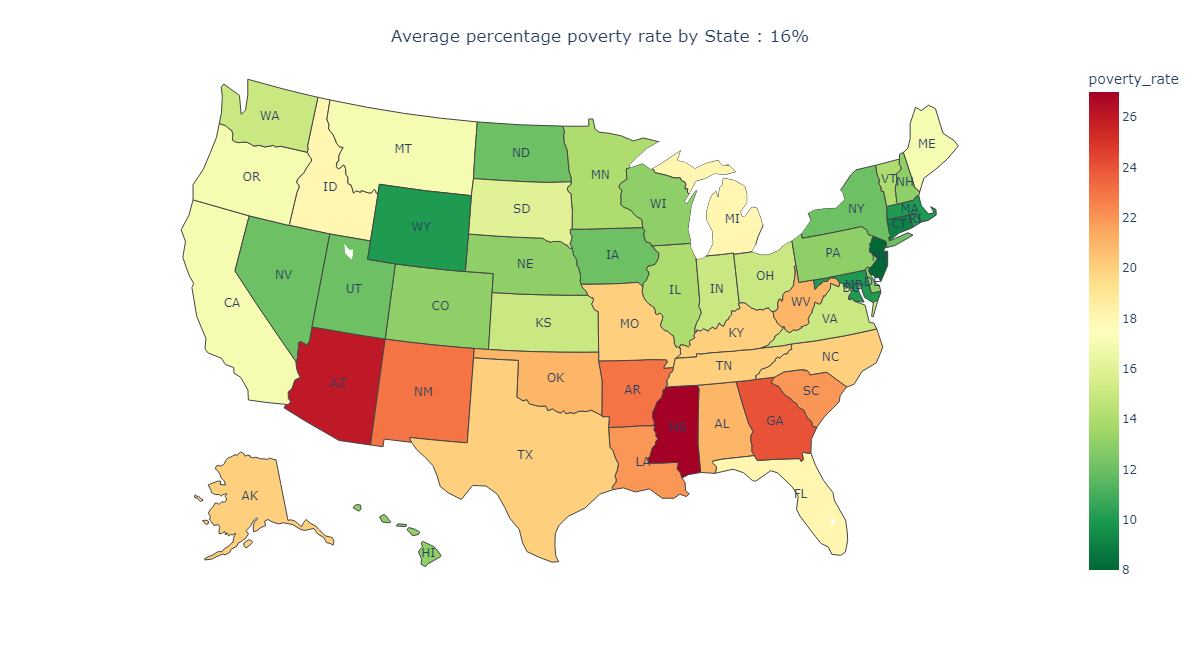

In [34]:
df_pct = df_pct_poverty.groupby("Geographic Area").mean().apply(round)

fig = px.choropleth(df_pct,
                    locations=df_pct.index,
                    color='poverty_rate',
                    color_continuous_scale='rdylgn_r',
                    hover_name='poverty_rate',
                    locationmode='USA-states',
                    scope='usa')

fig.add_scattergeo(
    locations=df_pct.index,
    locationmode='USA-states',
    text=df_pct.index,
    mode='text')

fig.update_layout(
    title={'text':f'Average percentage poverty rate by State : {int(df_pct.mean())}%',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show(renderer="png", width=1200,height=660)

In [43]:
df_fatalities["state"].value_counts()

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
IN     43
WI     43
KY     43
NV     42
OR     38
MD     38
MI     37
NJ     35
MN     32
WV     27
AR     26
KS     24
MS     23
UT     23
MA     22
ID     17
AK     15
NE     15
ME     13
IA     12
MT     11
HI     11
DC     11
SD     10
CT      9
DE      8
WY      8
NH      7
ND      4
VT      3
RI      2
Name: state, dtype: int64